In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
#importing Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image
from sklearn.utils import shuffle



In [3]:
# Assigning file_path location
no_dir =Path('/content/drive/MyDrive/data_science_project/data_science_project/brain_image/no')
yes_dir = Path('/content/drive/MyDrive/data_science_project/data_science_project/brain_image/yes')
pred_dir=Path('/content/drive/MyDrive/data_science_project/data_science_project/brain_image/pred')

In [4]:
No_image_list=list(no_dir.glob('*.jpg'))
Yes_image_list=list(yes_dir.glob('*.jpg'))
pred_dir_list=list(pred_dir.glob('*.jpg'))

In [5]:
#checking count of data label
print('No of No brain tumor images are:' , len(No_image_list))
print('No of Yes brain tumor images are:' , len(Yes_image_list))
print('No of Yes brain tumor images are:' , len(pred_dir_list))

No of No brain tumor images are: 1500
No of Yes brain tumor images are: 1500
No of Yes brain tumor images are: 60


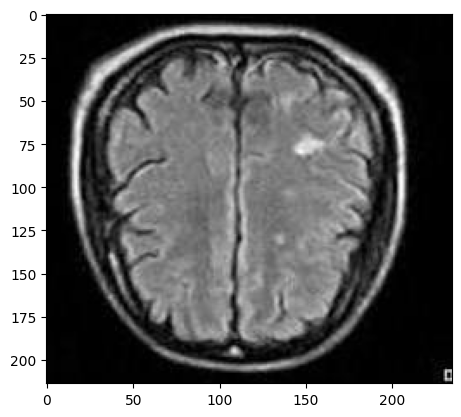

image shape is (214, 235, 3)


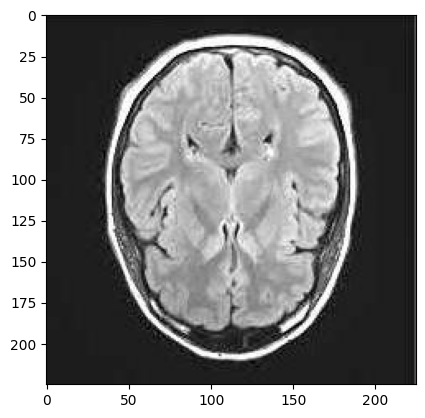

image shape is (225, 225, 3)


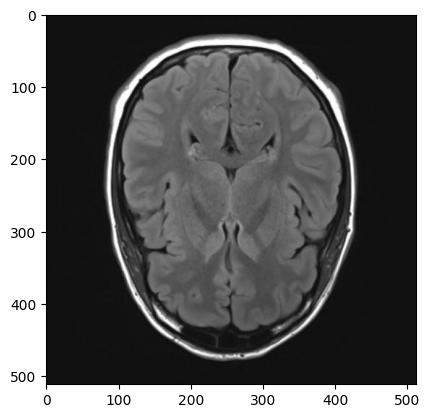

image shape is (512, 512, 3)


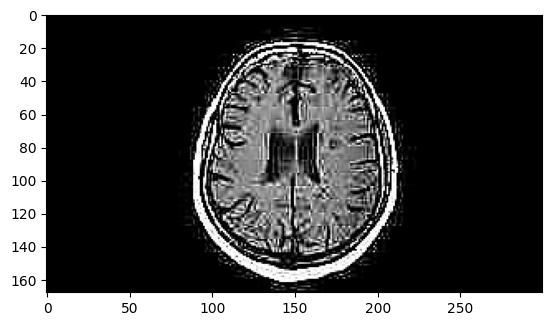

image shape is (168, 300, 3)


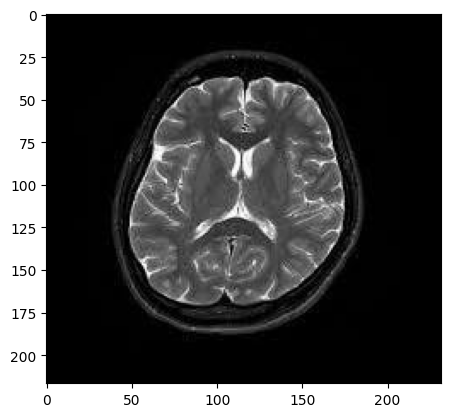

image shape is (217, 232, 3)


In [6]:
# visualizing non tumor image and there size
for i in range(5):
  image=cv2.imread(str(No_image_list[i]))
  plt.imshow(image)
  plt.show()
  height, width, channels= image.shape
  print(f'image shape is {image.shape}')



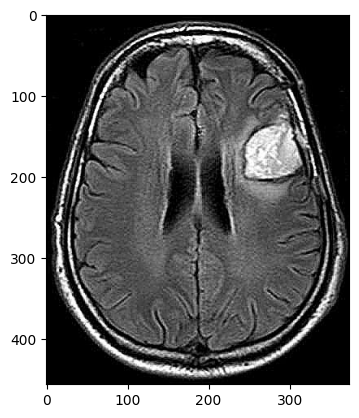

image shape is (456, 374, 3)


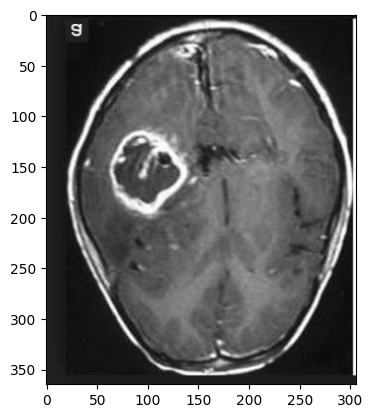

image shape is (365, 306, 3)


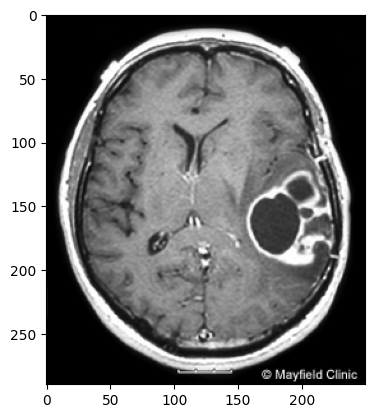

image shape is (290, 250, 3)


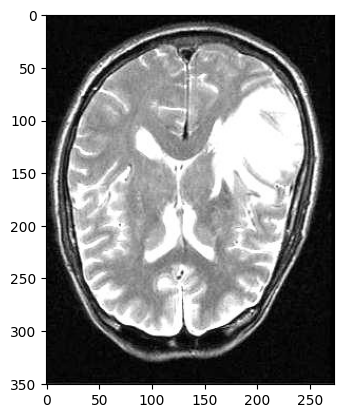

image shape is (351, 273, 3)


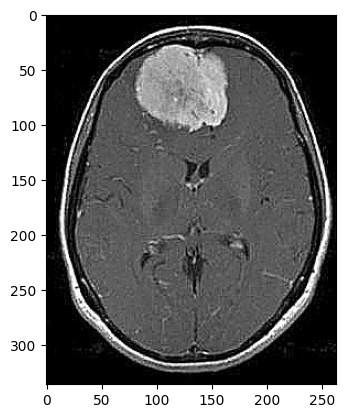

image shape is (336, 264, 3)


In [7]:
# visualizing tumor image and there size

for i in range(5):
  image=cv2.imread(str(Yes_image_list[i]))
  plt.imshow(image)
  plt.show()
  height, width, channels= image.shape
  print(f'image shape is {image.shape}')

# Image Prerocessing


In [8]:
# firstly observed that every image size is different


In [9]:
def preprocess (image):
  preprocess_image=[]
  for i in image:
    image1=cv2.imread(str(i))
    resized_image= cv2.resize(image1,(224,224))
    normalized_image=resized_image/255
    preprocess_image.append(normalized_image)
  return preprocess_image



In [10]:
No_preprocessed_images=preprocess(No_image_list)
Yes_preprocessed_images= preprocess(Yes_image_list)
pred_preprocessed_images= preprocess(pred_dir_list)

In [11]:
No_preprocessed_images[0]

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0

In [12]:
No_preprocessed_images[0].shape

(224, 224, 3)

In [13]:
Yes_preprocessed_images[0].shape

(224, 224, 3)

In [14]:
pred_preprocessed_images[0].shape

(224, 224, 3)

In [15]:
no_labels = np.zeros(len(No_preprocessed_images))
yes_labels = np.ones(len(Yes_preprocessed_images))



In [16]:
data = np.concatenate((No_preprocessed_images, Yes_preprocessed_images), axis=0)
labels = np.concatenate((no_labels, yes_labels), axis=0)
test_data=pred_preprocessed_images

In [17]:
type(data)

numpy.ndarray

In [18]:
type(test_data)

list

In [19]:
type(labels)

numpy.ndarray

In [20]:
data[1]

array([[[0.34117647, 0.34117647, 0.34117647],
        [0.34117647, 0.34117647, 0.34117647],
        [0.34117647, 0.34117647, 0.34117647],
        ...,
        [0.33333333, 0.33333333, 0.33333333],
        [0.3254902 , 0.3254902 , 0.3254902 ],
        [0.56078431, 0.56078431, 0.56078431]],

       [[0.10980392, 0.10980392, 0.10980392],
        [0.10980392, 0.10980392, 0.10980392],
        [0.10980392, 0.10980392, 0.10980392],
        ...,
        [0.10980392, 0.10980392, 0.10980392],
        [0.10196078, 0.10196078, 0.10196078],
        [0.3372549 , 0.3372549 , 0.3372549 ]],

       [[0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        ...,
        [0.08235294, 0.08235294, 0.08235294],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.31372549, 0.31372549, 0.31372549]],

       ...,

       [[0.10980392, 0.10980392, 0.10980392],
        [0.10980392, 0.10980392, 0.10980392],
        [0.10980392, 0

In [21]:
data,label=shuffle(data, labels, random_state=42)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)


In [ ]:
y_train[1]

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))


In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
import psutil

def print_memory_usage():
    process = psutil.Process(os.getpid())
    print(f"Memory Usage: {process.memory_info().rss / (1024 ** 2):.2f} MB")

# Add this line before and after the memory-intensive operations
print_memory_usage()


In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=1), epochs=5, validation_data=datagen.flow(X_test, y_test, batch_size=1))
